In [1]:
import numpy as np
import scipy.stats as st
import glob
import matplotlib.pyplot as pl
import warnings
import h5py
from tqdm import tqdm_notebook
from scipy.interpolate import interp1d
warnings.simplefilter('ignore')

In [2]:
pl.rcParams['figure.figsize'] = (16/2.54, 16/2.54)
pl.rcParams['font.size'] = 11
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'out'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.minor.visible'] = True
pl.rcParams['ytick.right'] = True
pl.rcParams['xtick.top'] = True
pl.rcParams['figure.dpi'] = 96

In [3]:
models = [model.split('/')[-1] for model in glob.glob('../data_input/cmip6/*')]

In [4]:
# models = [
# 'ACCESS-CM2',     'CanESM5-CanOE',   'CNRM-CM6-1',    'EC-Earth3-LR',     'GISS-E2-1-G',     'INM-CM5-0',       'NESM3',
# 'ACCESS-ESM1-5',  'CAS-ESM2-0',      'CNRM-CM6-1-HR', 'EC-Earth3-Veg',    'GISS-E2-1-G-CC',  'IPSL-CM6A-LR',    'NorCPM1',
# 'AWI-CM-1-1-MR',  'CESM2',           'CNRM-ESM2-1',   'EC-Earth3-Veg-LR', 'GISS-E2-1-H',     'MIROC6',          'NorESM1-F',
# 'AWI-ESM-1-1-LR', 'CESM2-FV2',                        'FGOALS-f3-L',      'GISS-E2-2-G',     'MIROC-ES2L',      'NorESM2-LM',
# 'BCC-CSM2-MR',    'CESM2-WACCM',     'E3SM-1-0',      'FGOALS-g3',        'HadGEM3-GC31-LL', 'MPI-ESM-1-2-HAM', 'NorESM2-MM',
# 'BCC-ESM1',       'CESM2-WACCM-FV2', 'E3SM-1-1',      'FIO-ESM-2-0',      'HadGEM3-GC31-MM', 'MPI-ESM1-2-HR',   'SAM0-UNICON',
# 'CAMS-CSM1-0',    'CIESM',           'E3SM-1-1-ECA',  'GFDL-CM4',         'IITM-ESM',        'MPI-ESM1-2-LR',   'TaiESM1',
# 'CanESM5',        'CMCC-CM2-SR5',    'EC-Earth3',     'GFDL-ESM4',        'INM-CM4-8',       'MRI-ESM2-0',      'UKESM1-0-LL'
# ]

In [7]:
historical = {}
accepted_models = []
nyears = {}

for model in models:
    historical[model] = {}
    path_hist_tas  = glob.glob('../data_input/cmip6/%s/historical/*/tas.txt' % model)
#    if model=='CanESM5' or model=='GISS-E2-1-G':
#        dirhist  = [x for x in dirhist if 'r1i1p1f1' in x]
    # experiment missing? skip model
    if len(path_hist_tas)==0:
        print(model + ' not provided historical tas')
        continue
    historical[model]['tas'] = np.zeros((165))
    nens = 0
    for ens in path_hist_tas:
        print(ens)
        tas = np.loadtxt(ens)
        if tas.size >= 165:
            historical[model]['tas']  = historical[model]['tas'] + tas[:165]
            nens = nens + 1
    if nens == 0:
        continue
    historical[model]['tas'] = historical[model]['tas'] / nens
    nyears[model]  = 165
    historical[model]['1951-1980'] = np.mean(historical[model]['tas'][101:131]) - np.mean(historical[model]['tas'][0:51])
    historical[model]['1961-1990'] = np.mean(historical[model]['tas'][111:141]) - np.mean(historical[model]['tas'][0:51])
    historical[model]['1995-2014'] = np.mean(historical[model]['tas'][145:165]) - np.mean(historical[model]['tas'][0:51])
    # if we get this far, things have worked out well
    accepted_models.append(model)

../data_input/cmip6/BCC-CSM2-MR/historical/r1i1p1f1/tas.txt
../data_input/cmip6/BCC-CSM2-MR/historical/r2i1p1f1/tas.txt
../data_input/cmip6/BCC-CSM2-MR/historical/r3i1p1f1/tas.txt
../data_input/cmip6/FGOALS-f3-L/historical/r1i1p1f1/tas.txt
../data_input/cmip6/FGOALS-f3-L/historical/r2i1p1f1/tas.txt
../data_input/cmip6/FGOALS-f3-L/historical/r3i1p1f1/tas.txt
../data_input/cmip6/KACE-1-0-G/historical/r1i1p1f1/tas.txt
../data_input/cmip6/MCM-UA-1-0/historical/r1i1p1f2/tas.txt
../data_input/cmip6/MCM-UA-1-0/historical/r1i1p1f1/tas.txt
../data_input/cmip6/CESM2-WACCM-FV2/historical/r1i1p1f1/tas.txt
../data_input/cmip6/CESM2-WACCM-FV2/historical/r2i1p1f1/tas.txt
../data_input/cmip6/CESM2-WACCM-FV2/historical/r3i1p1f1/tas.txt
../data_input/cmip6/CNRM-CM6-1-HR/historical/r1i1p1f2/tas.txt
../data_input/cmip6/INM-CM4-8/historical/r1i1p1f1/tas.txt
../data_input/cmip6/IPSL-CM6A-LR/historical/r21i1p1f1/tas.txt
../data_input/cmip6/IPSL-CM6A-LR/historical/r13i1p1f1/tas.txt
../data_input/cmip6/IPSL-CM

../data_input/cmip6/CNRM-ESM2-1/historical/r7i1p1f2/tas.txt
../data_input/cmip6/CNRM-ESM2-1/historical/r4i1p1f2/tas.txt
../data_input/cmip6/CNRM-ESM2-1/historical/r3i1p1f2/tas.txt
../data_input/cmip6/CNRM-ESM2-1/historical/r1i1p1f2/tas.txt
../data_input/cmip6/CNRM-ESM2-1/historical/r5i1p1f2/tas.txt
../data_input/cmip6/CNRM-ESM2-1/historical/r2i1p1f2/tas.txt
../data_input/cmip6/CNRM-ESM2-1/historical/r10i1p1f2/tas.txt
../data_input/cmip6/CNRM-ESM2-1/historical/r9i1p1f2/tas.txt
../data_input/cmip6/CNRM-ESM2-1/historical/r8i1p1f2/tas.txt
../data_input/cmip6/AWI-CM-1-1-MR/historical/r4i1p1f1/tas.txt
../data_input/cmip6/AWI-CM-1-1-MR/historical/r1i1p1f1/tas.txt
../data_input/cmip6/AWI-CM-1-1-MR/historical/r5i1p1f1/tas.txt
../data_input/cmip6/AWI-CM-1-1-MR/historical/r2i1p1f1/tas.txt
../data_input/cmip6/AWI-CM-1-1-MR/historical/r3i1p1f1/tas.txt
../data_input/cmip6/TaiESM1/historical/r1i1p1f1/tas.txt
../data_input/cmip6/FGOALS-g3/historical/r1i1p1f1/tas.txt
../data_input/cmip6/FGOALS-g3/histo

../data_input/cmip6/CESM2/historical/r3i1p1f1/tas.txt
../data_input/cmip6/MPI-ESM1-2-HR/historical/r10i1p1f1/tas.txt
../data_input/cmip6/MPI-ESM1-2-HR/historical/r4i1p1f1/tas.txt
../data_input/cmip6/MPI-ESM1-2-HR/historical/r6i1p1f1/tas.txt
../data_input/cmip6/MPI-ESM1-2-HR/historical/r9i1p1f1/tas.txt
../data_input/cmip6/MPI-ESM1-2-HR/historical/r1i1p1f1/tas.txt
../data_input/cmip6/MPI-ESM1-2-HR/historical/r5i1p1f1/tas.txt
../data_input/cmip6/MPI-ESM1-2-HR/historical/r7i1p1f1/tas.txt
../data_input/cmip6/MPI-ESM1-2-HR/historical/r8i1p1f1/tas.txt
../data_input/cmip6/MPI-ESM1-2-HR/historical/r2i1p1f1/tas.txt
../data_input/cmip6/MPI-ESM1-2-HR/historical/r3i1p1f1/tas.txt
../data_input/cmip6/CanESM5/historical/r20i1p2f1/tas.txt
../data_input/cmip6/CanESM5/historical/r26i1p2f1/tas.txt
../data_input/cmip6/CanESM5/historical/r33i1p2f1/tas.txt
../data_input/cmip6/CanESM5/historical/r1i1p2f1/tas.txt
../data_input/cmip6/CanESM5/historical/r24i1p2f1/tas.txt
../data_input/cmip6/CanESM5/historical/r8

In [8]:
len(accepted_models)
#nyears

56

In [9]:
cw_temp = np.loadtxt('../data_input/CW.txt')
blratio = np.loadtxt('../data_input/cmip5_data_2019.txt')[5,:]
cowtan = cw_temp[:,1] - np.mean(cw_temp[:51,1])
blratio  = np.concatenate((np.ones(11), blratio))
Tobs = blratio * cowtan
#Tobs=cowtan
print(np.mean(Tobs[111:141]))
print(np.mean(Tobs[101:131]))

0.3880225470588235
0.3295748603921568


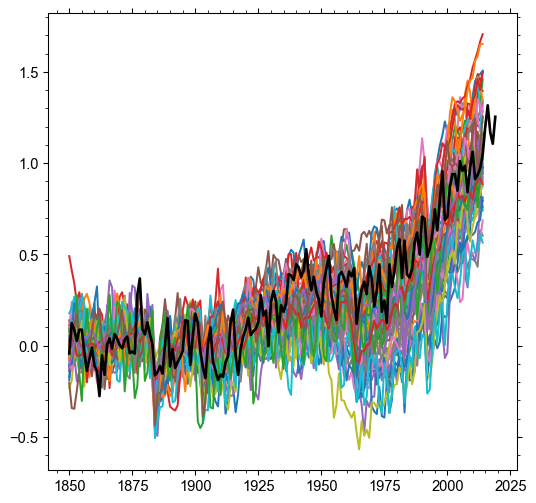

In [10]:
sixtyoneninety=np.ones(len(accepted_models))*np.nan
fiftyoneeighty=np.ones(len(accepted_models))*np.nan
ninetyfivefourteen = np.ones(len(accepted_models))*np.nan
full=np.ones((165, len(accepted_models)))
for i, model in enumerate(accepted_models):
    full[:,i] = historical[model]['tas'][:165] - np.mean(historical[model]['tas'][0:51])
    pl.plot(np.arange(1850, 1850+nyears[model]), historical[model]['tas'] - np.mean(historical[model]['tas'][0:51]))
    sixtyoneninety[i] = historical[model]['1961-1990']
    fiftyoneeighty[i] = historical[model]['1951-1980']
    ninetyfivefourteen[i] = historical[model]['1995-2014']
pl.plot(np.arange(1850, 2020), Tobs, color='k', lw=2)

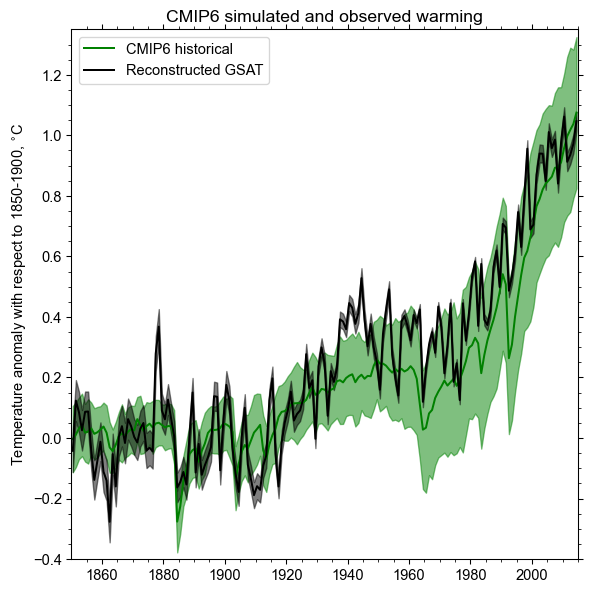

In [11]:
fig, ax=pl.subplots()#figsize=(9.5/2.54,9.5/2.54))
ax.fill_between(np.arange(1850.5,2015), np.mean(full,axis=1)-np.std(full, axis=1), np.mean(full,axis=1)+np.std(full,axis=1), color='green', alpha=0.5)
ax.plot(np.arange(1850.5,2015), np.mean(full, axis=1), color='green', label='CMIP6 historical')
ax.fill_between(np.arange(1850.5,2015), Tobs[:-5]-cw_temp[:-5,2], Tobs[:-5]+cw_temp[:-5,2], color='k', alpha=0.5)
ax.plot(np.arange(1850.5,2015), Tobs[:-5], color='k', label='Reconstructed GSAT')
ax.set_xlim(1850,2015)
ax.set_ylim(-0.4, 1.35)
ax.legend(loc='upper left')
ax.set_ylabel('Temperature anomaly with respect to 1850-1900, $^{\circ}$C')
ax.set_title('CMIP6 simulated and observed warming')
pl.tight_layout()
pl.savefig('../figures/figureS7.png', dpi=300)
pl.savefig('../figures/figureS7.pdf')

In [12]:
print(np.mean(sixtyoneninety))
print(np.mean(fiftyoneeighty))

0.23558885471650676
0.18990692524046335


In [13]:
print(np.std(sixtyoneninety))
print(np.std(fiftyoneeighty))

0.21682356789981122
0.1878258171555835


In [14]:
# cowtan and way uncertainty from 1850-1900 to 1961-90 (one sigma)
np.sqrt(np.sqrt(np.sum(cw_temp[:51,2]**2)/51)**2 + np.sqrt(np.sum(cw_temp[111:141,2]**2)/30)**2)

0.06068938919435846

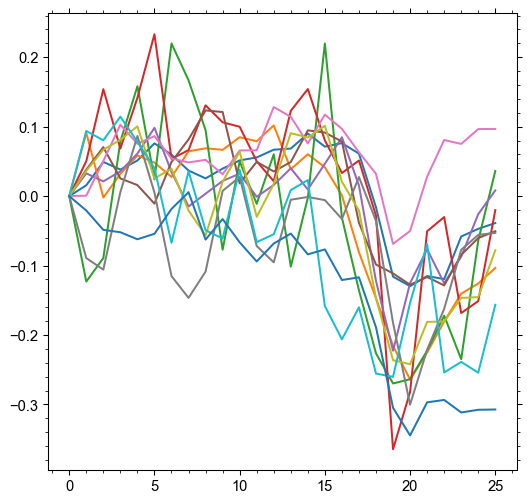

In [15]:
for model in ['CanESM5','E3SM-1-0','GFDL-CM4','GFDL-ESM4','GISS-E2-1-G','HadGEM3-GC31-LL','IPSL-CM6A-LR',
             'MIROC6','MRI-ESM2-0','NorESM2-LM','UKESM1-0-LL']:
    pl.plot(historical[model]['tas'][95:121]-historical[model]['tas'][95])

In [16]:
for model in ['CanESM5','E3SM-1-0','GFDL-CM4','GFDL-ESM4','GISS-E2-1-G','HadGEM3-GC31-LL','IPSL-CM6A-LR',
             'MIROC6','MRI-ESM2-0','NorESM2-LM','UKESM1-0-LL']:
    print(model, historical[model]['1995-2014']-historical[model]['1951-1980'])

CanESM5 0.9858432243852349
E3SM-1-0 0.6031797720724512
GFDL-CM4 0.659007059052044
GFDL-ESM4 0.5237159929126847
GISS-E2-1-G 0.5486018260260721
HadGEM3-GC31-LL 0.6641380707581561
IPSL-CM6A-LR 0.6826403964637962
MIROC6 0.4538072792483945
MRI-ESM2-0 0.636324333293885
NorESM2-LM 0.5316668456084699
UKESM1-0-LL 0.7145418358030042


In [17]:
st.linregress(np.arange(11), Tobs[159:])

LinregressResult(slope=0.030224482299465227, intercept=0.9351041189839573, rvalue=0.7450056824612076, pvalue=0.008515983514791412, stderr=0.009020730428364565)